8

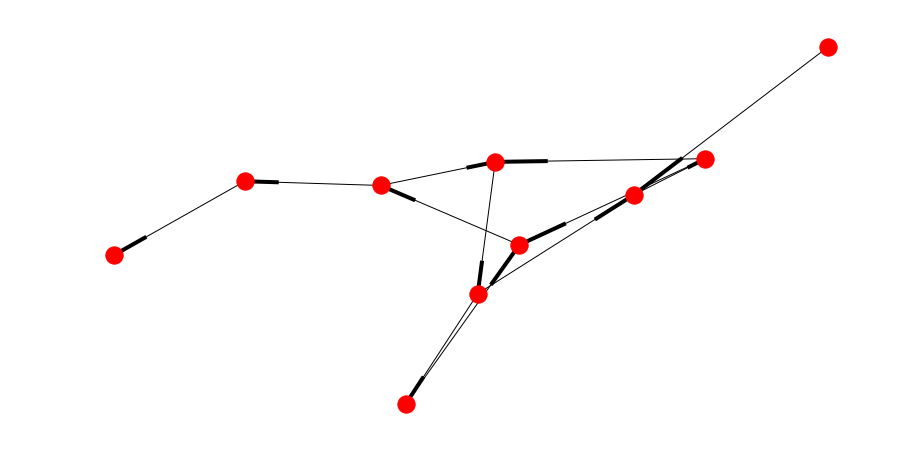

In [15]:
from aocd import get_data
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

def solve(data):
    g = nx.DiGraph()
    BIG = 10000
    for nr, line in enumerate(data.split("\n")):
        ins, val = line.split(" ")
        val = int(val)
        g.add_node(nr, label=line)
        if ins == "nop":
            g.add_edge(nr, nr+val, label=BIG) # add big connection first, in case the normal version overrides it
            g.add_edge(nr, nr+1, label=0)
        elif ins == "jmp":
            g.add_edge(nr, nr+1, label=BIG)
            g.add_edge(nr, nr+val, label=0)
        elif ins == "acc":
            g.add_edge(nr, nr+1, label=val)
    plt.figure(figsize=(12, 6))
    nx.draw_spring(g, nodesize=15)
    return nx.shortest_path_length(g, 0, nr+1, weight="label") - BIG

solve("""nop +0
acc +1
jmp +4
acc +3
jmp -3
acc -99
acc +1
jmp -4
acc +6""")

1260

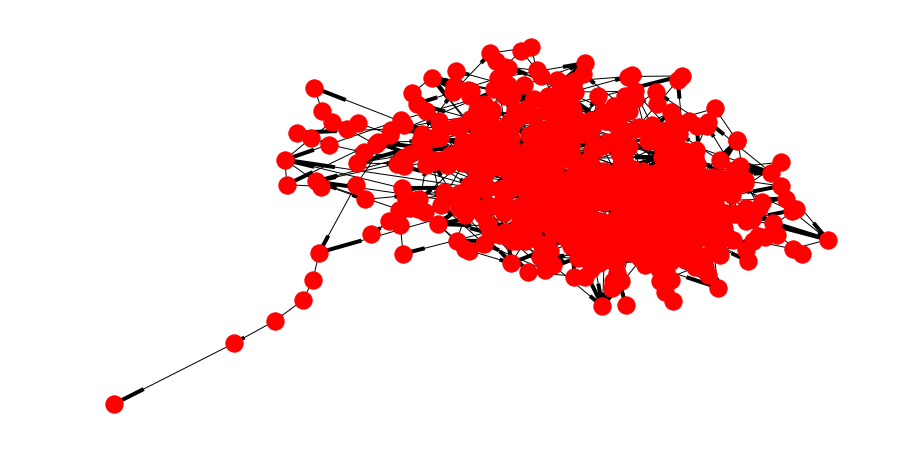

In [16]:
solve(get_data(day=8))